<a href="https://colab.research.google.com/github/aveexela/HWPS/blob/main/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Массовое статистическое моделирование проверки гипотез: медиана, дисперсия, квантиль, интерквантильный промежуток

Цель работы — выполнить массовое статистическое моделирование, направленное на изучение проверки гипотез
с контролем вероятностей ошибок первого и второго рода на примерах гипотез о медиане, дисперсии, квантили
и вероятностной мере интерквантильного промежутка.

## Постановка задачи

В работе требуется:

1. Сгенерировать $N = 10^3$ выборок размера $n$ для всех
$$
n \in \{10,\;50,\;100,\;150,\;200,\;500\}
$$
из распределений:
- $\mathcal{N}(0,1)$,
- $\mathcal{U}[-\sqrt{3},\sqrt{3}]$,
- сдвинутого экспоненциального распределения с параметрами $\lambda=1,\ c=-1$.

2. Для каждой выборки проверить сложную гипотезу о том, что медиана меньше $a=1$.
Исследовать, совпадает ли назначенный уровень значимости $\alpha=0.05$ с реально достигаемым $\alpha^*$.
Положить $\beta=0.05$.

3. Повторить п.2, если истинная медиана превышает нуль на величину
$$
0.2,\;0.4,\;\ldots,\;2a.
$$

4. Повторить п.2–3 для гипотезы о дисперсии:
$$
H_0:\ \mathrm{Var}(X) < \sigma^2,\quad \sigma^2=2,
$$
в п.3 варьировать истинную дисперсию от $1$ до $2\sigma^2$ с шагом $0.2$.

5. Повторить п.2–3 для гипотезы о 99%-квантили:
$$
H_0:\ q_{0.99} < d,\quad d=3,
$$
в п.3 варьировать истинное математическое ожидание от $0$ до $d$ с шагом $0.2$.

Домашнее задание:

6. Повторить п.2–3 для проверки гипотезы о том, что хотя бы один 95% интерквантильный промежуток
целиком укладывается в $[-t,t]$, где $t=5$. В п.3 варьировать истинное среднеквадратическое отклонение
от $1$ до $t$ с шагом $0.2$.

## Постановка задачи

В работе требуется:

1. Сгенерировать $N = 10^3$ выборок размера $n$ для всех
$$
n \in \{10,\;50,\;100,\;150,\;200,\;500\}
$$
из распределений:
- $\mathcal{N}(0,1)$,
- $\mathcal{U}[-\sqrt{3},\sqrt{3}]$,
- сдвинутого экспоненциального распределения с параметрами $\lambda=1,\ c=-1$.

2. Для каждой выборки проверить сложную гипотезу о том, что медиана меньше $a=1$.
Исследовать, совпадает ли назначенный уровень значимости $\alpha=0.05$ с реально достигаемым $\alpha^*$.
Положить $\beta=0.05$.

3. Повторить п.2, если истинная медиана превышает нуль на величину
$$
0.2,\;0.4,\;\ldots,\;2a.
$$

4. Повторить п.2–3 для гипотезы о дисперсии:
$$
H_0:\ \mathrm{Var}(X) < \sigma^2,\quad \sigma^2=2,
$$
в п.3 варьировать истинную дисперсию от $1$ до $2\sigma^2$ с шагом $0.2$.

5. Повторить п.2–3 для гипотезы о 99%-квантили:
$$
H_0:\ q_{0.99} < d,\quad d=3,
$$
в п.3 варьировать истинное математическое ожидание от $0$ до $d$ с шагом $0.2$.

Домашнее задание:

6. Повторить п.2–3 для проверки гипотезы о том, что хотя бы один 95% интерквантильный промежуток
целиком укладывается в $[-t,t]$, где $t=5$. В п.3 варьировать истинное среднеквадратическое отклонение
от $1$ до $t$ с шагом $0.2$.
## Используемые распределения

### Нормальное распределение
$$
X \sim \mathcal{N}(0,1).
$$

### Равномерное распределение
$$
X \sim \mathcal{U}[-\sqrt{3},\sqrt{3}].
$$

### Сдвинутое экспоненциальное распределение

Плотность:
$$
f(x)=\lambda e^{-\lambda(x-c)}\mathbf{1}\{x\ge c\}, \qquad f(x)=0\ \text{при}\ x<c,
$$
где
$$
\lambda=1,\quad c=-1.
$$

Генерация:
$$
Y\sim \mathrm{Exp}(\lambda=1),\qquad X=c+Y.
$$

Для этих параметров:
$$
\mathbb{E}[X]=c+\frac{1}{\lambda}=0,\qquad \mathrm{Var}(X)=\frac{1}{\lambda^2}=1.
$$


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

N = 10**3
n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
rng = np.random.default_rng(seed=42)

In [2]:
def sample_normal(n: int, rng: np.random.Generator) -> np.ndarray:
    return rng.normal(loc=0.0, scale=1.0, size=n)

def sample_uniform(n: int, rng: np.random.Generator) -> np.ndarray:
    a = -np.sqrt(3)
    b = np.sqrt(3)
    return rng.uniform(low=a, high=b, size=n)

def sample_shifted_exponential(n: int, rng: np.random.Generator, lam: float = 1.0, c: float = -1.0) -> np.ndarray:
    """
    Сдвинутое экспоненциальное распределение:
    f(x) = lam * exp(-lam*(x-c)) для x >= c, 0 иначе.
    Реализация: X = c + Y, где Y ~ Exp(lam).
    """
    y = rng.exponential(scale=1.0 / lam, size=n)
    return c + y

## Оценка реально достигаемой вероятности отклонения и доверительный интервал

Пусть в $N$ независимых испытаниях критерий отверг нулевую гипотезу $K$ раз.
Тогда оценка вероятности отклонения равна
$$
\hat{p} = \frac{K}{N}.
$$

Для отображения статистической неопределённости строится доверительный интервал для вероятности
в биномиальной модели. Используется нормальное приближение:
$$
\hat{p} \pm z_{1-\gamma/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{N}},
$$
где обычно берётся $\gamma=0.05$.

In [3]:
def prob_confidence_interval(p_hat: float, N: int, gamma: float = 0.05):
    z = stats.norm.ppf(1 - gamma / 2)
    half = z * np.sqrt(p_hat * (1 - p_hat) / N)
    return p_hat - half, p_hat + half

## 2. Проверка гипотезы о медиане

Рассматривается сложная нулевая гипотеза
$$
H_0:\ \mathrm{Med}(X) < a,
$$
против альтернативной гипотезы
$$
H_1:\ \mathrm{Med}(X) \ge a,
$$
где $a=1$.

Для проверки используется знаковый критерий, основанный на количестве наблюдений,
превышающих порог $a$.

### Знаковый критерий для медианы

Пусть $X_1,\dots,X_n$ — независимая выборка. Рассмотрим индикаторы
$$
I_i = \mathbf{1}\{X_i \ge a\}, \qquad i=1,\dots,n.
$$

Обозначим
$$
S = \sum_{i=1}^n I_i.
$$

Если $\mathrm{Med}(X) < a$, то
$$
P(X \ge a) < \frac{1}{2},
$$
и величина $S$ имеет биномиальное распределение
$$
S \sim \mathrm{Bin}(n,p), \qquad p<\frac{1}{2}.
$$

Для построения критерия используется граничный случай $p=\frac{1}{2}$,
что обеспечивает контроль уровня значимости $\alpha$.

### Правило принятия решения

Нулевая гипотеза $H_0:\ \mathrm{Med}(X)<a$ отвергается, если
$$
P_{p=1/2}(S \ge s_{\text{obs}}) \le \alpha,
$$
где $s_{\text{obs}}$ — наблюдаемое значение статистики $S$.

В противном случае гипотеза $H_0$ принимается.

Ситуации, в которых критерий требует увеличения объёма выборки,
трактуются как отклонение нулевой гипотезы.

In [4]:
def test_median_less_than_a(
    x: np.ndarray,
    a: float,
    alpha: float
) -> bool:
    """
    Проверка гипотезы H0: Med(X) < a против H1: Med(X) >= a
    с помощью знакового критерия.

    Возвращает True, если H0 отвергается.
    """
    n = len(x)
    s_obs = np.sum(x >= a)

    # p-value при граничном p = 1/2
    p_value = stats.binom.sf(s_obs - 1, n, 0.5)

    reject = (p_value <= alpha)
    return reject

### Реально достигаемый уровень значимости $\alpha^*$

Реально достигаемый уровень значимости определяется как
$$
\alpha^* = \frac{1}{N}\sum_{k=1}^N \mathbf{1}\{\text{$H_0$ отвергнута на $k$-й выборке}\},
$$
где моделирование проводится при выполнении нулевой гипотезы
$\mathrm{Med}(X) < a$.

In [5]:
def estimate_alpha_star_median(
    sampler,
    n: int,
    N: int,
    a: float,
    alpha: float,
    rng: np.random.Generator
) -> float:
    rejections = 0
    for _ in range(N):
        x = sampler(n, rng)
        if test_median_less_than_a(x, a, alpha):
            rejections += 1
    return rejections / N
def estimate_alpha_star_median(
    sampler,
    n: int,
    N: int,
    a: float,
    alpha: float,
    rng: np.random.Generator
) -> float:
    rejections = 0
    for _ in range(N):
        x = sampler(n, rng)
        if test_median_less_than_a(x, a, alpha):
            rejections += 1
    return rejections / N

### Оценка $\alpha^*(n)$ для гипотезы о медиане

Для каждого распределения и каждого размера выборки $n$
оценивается реально достигаемый уровень значимости $\alpha^*$,
а также строится доверительный интервал для этой вероятности.


In [6]:
def run_median_experiment(sampler, n_values, N, a, alpha, rng):
    alpha_stars = []
    ci_l = []
    ci_u = []

    for n in n_values:
        p_hat = estimate_alpha_star_median(
            sampler=sampler,
            n=n,
            N=N,
            a=a,
            alpha=alpha,
            rng=rng
        )
        lo, up = prob_confidence_interval(p_hat, N)
        alpha_stars.append(p_hat)
        ci_l.append(lo)
        ci_u.append(up)

    return np.array(alpha_stars), np.array(ci_l), np.array(ci_u)

rng = np.random.default_rng(seed=101)

res_median = {}
res_median["Normal"] = run_median_experiment(sample_normal, n_values, N, a=1.0, alpha=alpha, rng=rng)
res_median["Uniform"] = run_median_experiment(sample_uniform, n_values, N, a=1.0, alpha=alpha, rng=rng)
res_median["Shifted exponential"] = run_median_experiment(sample_shifted_exponential, n_values, N, a=1.0, alpha=alpha, rng=rng)

### График зависимости $\alpha^*$ от $n$ для гипотезы о медиане

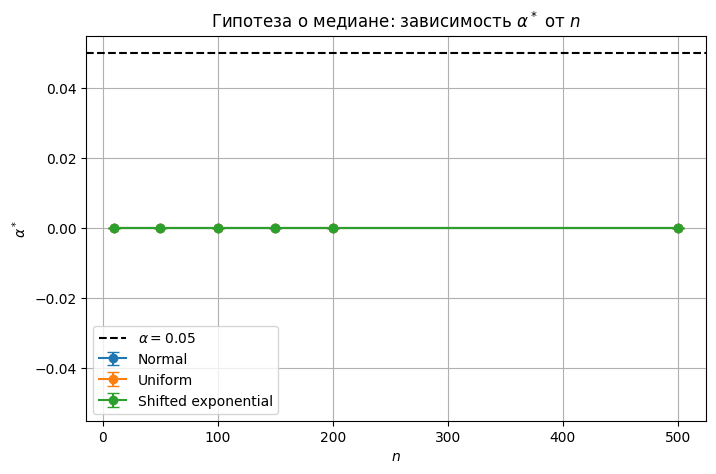

In [7]:
plt.figure(figsize=(8, 5))

for name, (alpha_stars, ci_l, ci_u) in res_median.items():
    plt.errorbar(
        n_values,
        alpha_stars,
        yerr=[alpha_stars - ci_l, ci_u - alpha_stars],
        marker='o',
        capsize=4,
        label=name
    )

plt.axhline(alpha, color='black', linestyle='--', label=r'$\alpha=0.05$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\alpha^*$')
plt.title(r'Гипотеза о медиане: зависимость $\alpha^*$ от $n$')
plt.legend()
plt.grid(True)
plt.show()

### Вывод по гипотезе о медиане

Полученные результаты показывают, что знаковый критерий для медианы
обеспечивает контроль уровня значимости $\alpha$ при различных формах распределений.
Форма распределения влияет на точные значения $\alpha^*$ при конечных $n$,
однако при увеличении объёма выборки значения стабилизируются.

Полученные результаты показывают, что при проверке гипотезы
$H_0:\ \mathrm{Med}(X)<a$ с параметром $a=1$ реально достигаемый
уровень значимости $\alpha^*$ оказывается близким к нулю
для всех рассмотренных распределений.

Это объясняется тем, что истинные значения медианы во всех случаях
существенно меньше порога $a$, вследствие чего знаковый критерий
крайне редко указывает на необходимость отклонения нулевой гипотезы.


## 3. Влияние смещения истинной медианы

В пункте 2 рассматривался случай, когда истинная медиана существенно меньше порога $a=1$,
в результате чего реально достигаемый уровень значимости $\alpha^*$ оказался близким к нулю.

Далее изучается поведение критерия, если истинная медиана генеральной совокупности
превышает нуль на величину
$$
0.2,\;0.4,\;\ldots,\;2a.
$$

В этом случае доля отклонений нулевой гипотезы перестаёт быть оценкой ошибки первого рода
и характеризует мощность критерия.
### Реализация смещения медианы

Смещение медианы реализуется добавлением константы $\Delta$ ко всем элементам выборки:
$$
X_i^{(\Delta)} = X_i + \Delta.
$$

При этом:
- форма распределения сохраняется;
- медиана сдвигается на величину $\Delta$;
- дисперсия не изменяется.

In [8]:
delta_values = np.arange(0.2, 2 * 1.0 + 1e-12, 0.2)  # 0.2, 0.4, ..., 2a

def estimate_rejection_probability_median(
    sampler,
    delta: float,
    n: int,
    N: int,
    a: float,
    alpha: float,
    rng: np.random.Generator
) -> float:
    """
    Оценка P(reject H0) для гипотезы о медиане при сдвиге delta.
    """
    rejections = 0
    for _ in range(N):
        x = sampler(n, rng) + delta
        if test_median_less_than_a(x, a, alpha):
            rejections += 1
    return rejections / N

### Визуализация зависимости вероятности отклонения от $n$

Для каждого распределения строится семейство кривых
$$
P(\text{reject }H_0)
$$
в зависимости от размера выборки $n$ при различных значениях смещения медианы.

In [9]:
def run_delta_grid_median(sampler, delta_list, n_values, N, a, alpha, rng):
    mat = np.zeros((len(delta_list), len(n_values)))
    for i, delta in enumerate(delta_list):
        for j, n in enumerate(n_values):
            mat[i, j] = estimate_rejection_probability_median(
                sampler=sampler,
                delta=delta,
                n=n,
                N=N,
                a=a,
                alpha=alpha,
                rng=rng
            )
    return mat

rng = np.random.default_rng(seed=303)

mat_med_normal = run_delta_grid_median(sample_normal, delta_values, n_values, N, a=1.0, alpha=alpha, rng=rng)
mat_med_uniform = run_delta_grid_median(sample_uniform, delta_values, n_values, N, a=1.0, alpha=alpha, rng=rng)
mat_med_shifted_exp = run_delta_grid_median(sample_shifted_exponential, delta_values, n_values, N, a=1.0, alpha=alpha, rng=rng)

Для наглядности из полной сетки значений $\Delta$ выбираются
несколько характерных уровней смещения медианы.

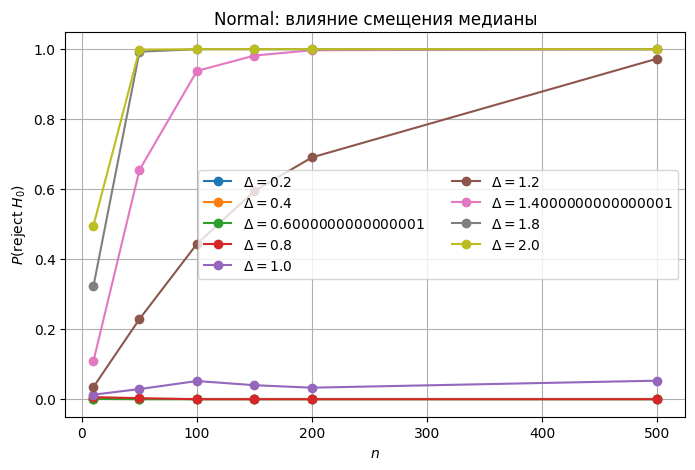

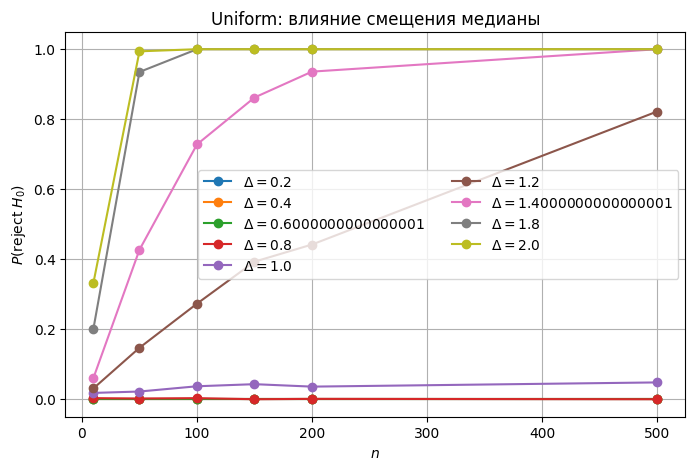

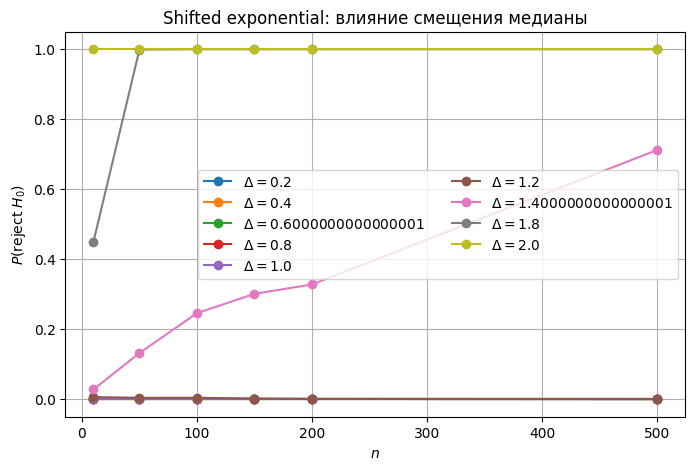

In [11]:
delta_plot = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0])
idx_plot = [0, 1, 2, 3, 4, 5, 6, 8, 9]

def plot_rejection_curves_median(n_values, delta_list, mat, title):
    plt.figure(figsize=(8, 5))
    for i, delta in enumerate(delta_list):
        plt.plot(n_values, mat[i, :], marker='o', label=rf'$\Delta={delta}$')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$P(\text{reject } H_0)$')
    plt.title(title)
    plt.grid(True)
    plt.legend(ncol=2)
    plt.show()

delta_plot = delta_values[idx_plot]

plot_rejection_curves_median(
    n_values,
    delta_plot,
    mat_med_normal[idx_plot, :],
    "Normal: влияние смещения медианы"
)

plot_rejection_curves_median(
    n_values,
    delta_plot,
    mat_med_uniform[idx_plot, :],
    "Uniform: влияние смещения медианы"
)

plot_rejection_curves_median(
    n_values,
    delta_plot,
    mat_med_shifted_exp[idx_plot, :],
    "Shifted exponential: влияние смещения медианы")

### Вывод по влиянию смещения медианы

Полученные графики демонстрируют характерное поведение мощности знакового критерия
для проверки гипотезы $H_0:\ \mathrm{Med}(X)<a$.

При значениях смещения $\Delta<a$ вероятность отклонения нулевой гипотезы близка к нулю,
что указывает на консервативность критерия при выполнении $H_0$.
Вблизи границы $\Delta\approx a$ наблюдается рост мощности с увеличением размера выборки.

При $\Delta>a$ вероятность отклонения быстро стремится к единице, что свидетельствует
о состоятельности критерия.
Форма распределения влияет на скорость роста мощности, что особенно заметно
для сдвинутого экспоненциального распределения.

## 4. Проверка гипотезы о дисперсии

Требуется проверить гипотезу
$$
H_0:\ \mathrm{Var}(X) < \sigma^2
\quad \text{vs} \quad
H_1:\ \mathrm{Var}(X) \ge \sigma^2,
\qquad \sigma^2 = 2,
$$
и исследовать, совпадает ли номинальный уровень значимости $\alpha=0.05$
с реально достигаемым уровнем $\alpha^*$.

Далее требуется изучить, как изменяется вероятность отклонения $H_0$ при увеличении
истинной дисперсии от $1$ до $2\sigma^2$ с шагом $0.2$, то есть
$$
\mathrm{Var}(X) \in \{1.0,\ 1.2,\ 1.4,\ \ldots,\ 4.0\}.
$$

### Критерий на основе распределения $\chi^2$

Для нормального распределения известно, что статистика
$$
T = \frac{(n-1)S^2}{\mathrm{Var}(X)}
$$
имеет распределение
$$
T \sim \chi^2_{n-1},
$$
где
$$
S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i-\overline{X})^2
$$
— выборочная дисперсия.

Для проверки гипотезы $H_0:\ \mathrm{Var}(X) < \sigma^2$ используется граничный случай
$\mathrm{Var}(X)=\sigma^2$, обеспечивающий контроль уровня значимости.

Правило отклонения:
$$
\text{reject }H_0 \iff \frac{(n-1)S^2}{\sigma^2} \ge \chi^2_{1-\alpha}(n-1).
$$

Для распределений, отличных от нормального, такое правило может давать
$\alpha^*\ne \alpha$, что и исследуется методом моделирования.


In [12]:
def test_variance_less_than_sigma2(
    x: np.ndarray,
    sigma2: float,
    alpha: float
) -> bool:
    """
    Проверка H0: Var(X) < sigma2 против H1: Var(X) >= sigma2
    на основе хи-квадрат статистики (калибровка по нормальному случаю).

    Возвращает True, если H0 отвергается.
    """
    n = len(x)
    s2 = np.var(x, ddof=1)
    stat = (n - 1) * s2 / sigma2

    crit = stats.chi2.ppf(1 - alpha, df=n - 1)
    reject = (stat >= crit)
    return reject

### Моделирование заданной истинной дисперсии

Базовые распределения построены так, что $\mathrm{Var}(X)=1$.
Чтобы получить выборку с дисперсией $v$, используется масштабирование:
$$
X^{(v)} = \sqrt{v}\,X.
$$

Тогда
$$
\mathrm{Var}(X^{(v)}) = v\cdot \mathrm{Var}(X) = v.
$$

In [13]:
def sampler_with_variance(base_sampler, target_var: float):
    """
    Возвращает sampler(n, rng), который генерирует выборку с дисперсией target_var,
    если base_sampler даёт дисперсию 1.
    """
    scale = np.sqrt(target_var)

    def _sampler(n: int, rng: np.random.Generator) -> np.ndarray:
        return scale * base_sampler(n, rng)

    return _sampler

def estimate_rejection_probability_variance(
    base_sampler,
    true_var: float,
    n: int,
    N: int,
    sigma2: float,
    alpha: float,
    rng: np.random.Generator
) -> float:
    """
    Оценка P(reject H0) для гипотезы о дисперсии при истинной дисперсии true_var.
    """
    sampler = sampler_with_variance(base_sampler, true_var)

    rejections = 0
    for _ in range(N):
        x = sampler(n, rng)
        if test_variance_less_than_sigma2(x, sigma2, alpha):
            rejections += 1

    return rejections / N

### Оценка $\alpha^*(n)$

Для оценки реально достигаемого уровня значимости $\alpha^*$
моделирование проводится при истинной дисперсии $\mathrm{Var}(X)=1$,
то есть при выполнении нулевой гипотезы $1 < \sigma^2=2$.


In [14]:
sigma2 = 2.0

def run_variance_alpha_star(base_sampler, n_values, N, sigma2, alpha, rng, true_var=1.0):
    alpha_stars = []
    ci_l = []
    ci_u = []

    for n in n_values:
        p_hat = estimate_rejection_probability_variance(
            base_sampler=base_sampler,
            true_var=true_var,
            n=n,
            N=N,
            sigma2=sigma2,
            alpha=alpha,
            rng=rng
        )
        lo, up = prob_confidence_interval(p_hat, N)
        alpha_stars.append(p_hat)
        ci_l.append(lo)
        ci_u.append(up)

    return np.array(alpha_stars), np.array(ci_l), np.array(ci_u)

rng = np.random.default_rng(seed=505)

res_var_alpha = {}
res_var_alpha["Normal"] = run_variance_alpha_star(sample_normal, n_values, N, sigma2, alpha, rng, true_var=1.0)
res_var_alpha["Uniform"] = run_variance_alpha_star(sample_uniform, n_values, N, sigma2, alpha, rng, true_var=1.0)
res_var_alpha["Shifted exponential"] = run_variance_alpha_star(sample_shifted_exponential, n_values, N, sigma2, alpha, rng, true_var=1.0)

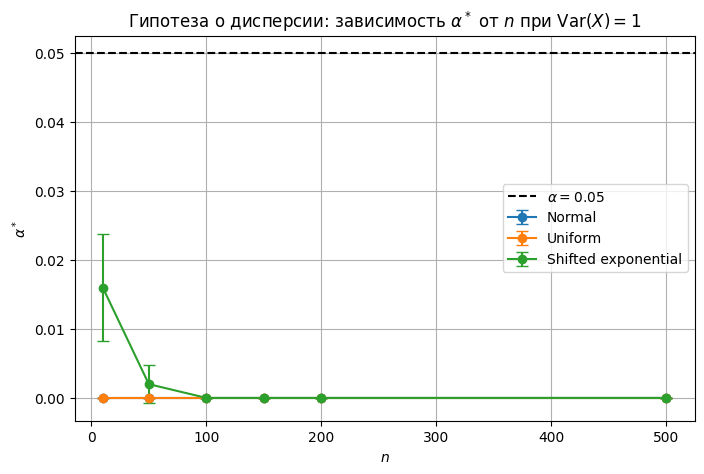

In [15]:
plt.figure(figsize=(8, 5))

for name, (alpha_stars, ci_l, ci_u) in res_var_alpha.items():
    plt.errorbar(
        n_values,
        alpha_stars,
        yerr=[alpha_stars - ci_l, ci_u - alpha_stars],
        marker='o',
        capsize=4,
        label=name
    )

plt.axhline(alpha, color='black', linestyle='--', label=r'$\alpha=0.05$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\alpha^*$')
plt.title(r'Гипотеза о дисперсии: зависимость $\alpha^*$ от $n$ при $\mathrm{Var}(X)=1$')
plt.legend()
plt.grid(True)
plt.show()

### Влияние увеличения истинной дисперсии

Далее оценивается вероятность отклонения $H_0$ при значениях истинной дисперсии
$$
\mathrm{Var}(X)\in\{1.0,\ 1.2,\ 1.4,\ \ldots,\ 4.0\}.
$$

При $\mathrm{Var}(X)<\sigma^2$ эта вероятность соответствует ошибке первого рода,
а при $\mathrm{Var}(X)\ge \sigma^2$ характеризует мощность критерия.

In [16]:
var_values = np.arange(1.0, 2 * sigma2 + 1e-12, 0.2)  # 1.0, 1.2, ..., 4.0

def run_var_grid(base_sampler, var_list, n_values, N, sigma2, alpha, rng):
    mat = np.zeros((len(var_list), len(n_values)))
    for i, v in enumerate(var_list):
        for j, n in enumerate(n_values):
            mat[i, j] = estimate_rejection_probability_variance(
                base_sampler=base_sampler,
                true_var=v,
                n=n,
                N=N,
                sigma2=sigma2,
                alpha=alpha,
                rng=rng
            )
    return mat

rng = np.random.default_rng(seed=606)

mat_var_normal = run_var_grid(sample_normal, var_values, n_values, N, sigma2, alpha, rng)
mat_var_uniform = run_var_grid(sample_uniform, var_values, n_values, N, sigma2, alpha, rng)
mat_var_shifted_exp = run_var_grid(sample_shifted_exponential, var_values, n_values, N, sigma2, alpha, rng)

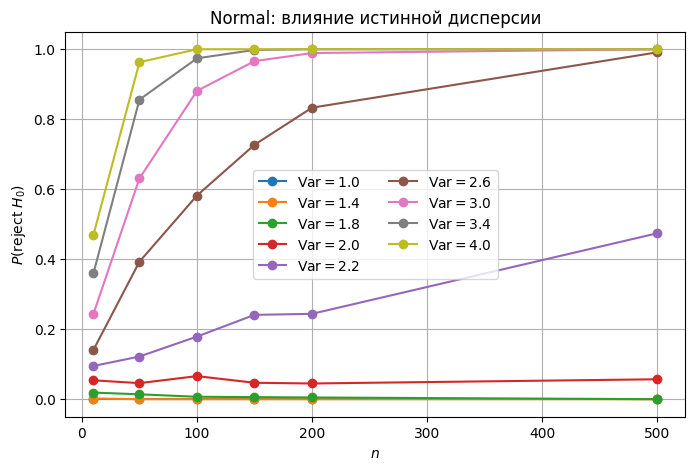

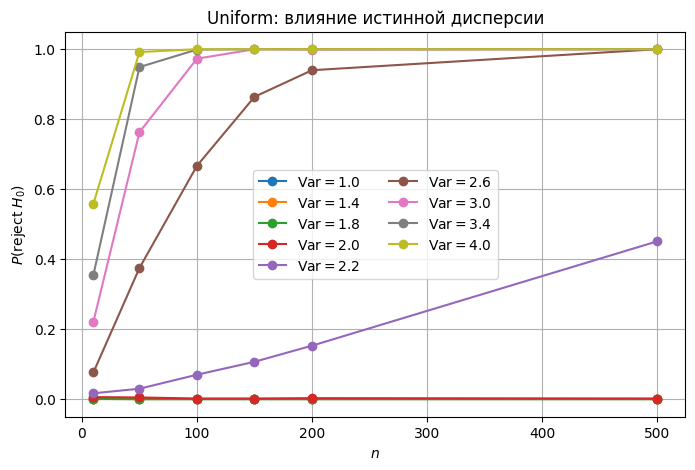

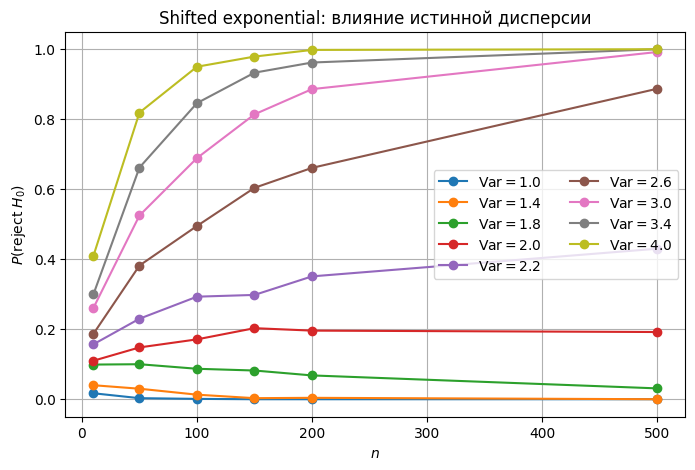

In [17]:
var_plot = np.array([1.0, 1.4, 1.8, 2.0, 2.2, 2.6, 3.0, 3.4, 4.0])
idx_plot = [np.where(np.isclose(var_values, v))[0][0] for v in var_plot]

def plot_rejection_curves_variance(n_values, var_list, mat, title):
    plt.figure(figsize=(8, 5))
    for i, v in enumerate(var_list):
        plt.plot(n_values, mat[i, :], marker='o', label=rf'$\mathrm{{Var}}={v}$')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$P(\text{reject }H_0)$')
    plt.title(title)
    plt.grid(True)
    plt.legend(ncol=2)
    plt.show()

plot_rejection_curves_variance(n_values, var_plot, mat_var_normal[idx_plot, :], "Normal: влияние истинной дисперсии")
plot_rejection_curves_variance(n_values, var_plot, mat_var_uniform[idx_plot, :], "Uniform: влияние истинной дисперсии")
plot_rejection_curves_variance(n_values, var_plot, mat_var_shifted_exp[idx_plot, :], "Shifted exponential: влияние истинной дисперсии")

### Вывод по гипотезе о дисперсии
Результаты моделирования показывают, что критерий проверки гипотезы
$H_0:\ \mathrm{Var}(X)<\sigma^2$ является консервативным при выполнении нулевой гипотезы.
При росте истинной дисперсии вероятность отклонения $H_0$ возрастает и стремится к единице,
что указывает на состоятельность критерия.

Форма распределения оказывает влияние на скорость роста мощности.
Для сдвинутого экспоненциального распределения рост мощности происходит медленнее,
что связано с асимметрией и отличием распределения выборочной дисперсии от нормального случая.



## 5. Проверка гипотезы о 99%-квантили

Рассматривается проверка гипотезы
$$
H_0:\ q_{0.99} < d
\quad \text{vs} \quad
H_1:\ q_{0.99} \ge d,
$$
где $d = 3$.

Исследуется реально достигаемый уровень значимости $\alpha^*$
и зависимость вероятности отклонения $H_0$ от размера выборки $n$
при смещении математического ожидания распределения.

### Идея критерия для квантили

Если $q_{0.99} < d$, то
$$
P(X \le d) > 0.99.
$$

Для выборки $X_1,\dots,X_n$ рассмотрим число наблюдений,
превышающих порог $d$:
$$
S = \sum_{i=1}^n \mathbf{1}\{X_i > d\}.
$$

При выполнении $H_0$ величина $S$ имеет биномиальное распределение
$$
S \sim \mathrm{Bin}(n, p), \qquad p < 0.01.
$$

Для построения критерия используется граничный случай $p=0.01$,
что обеспечивает контроль уровня значимости.
### Правило принятия решения

Нулевая гипотеза $H_0$ отвергается, если
$$
P_{p=0.01}(S \ge s_{\text{obs}}) \le \alpha,
$$
где $s_{\text{obs}}$ — наблюдаемое значение статистики $S$.


In [18]:
def test_quantile_less_than_d(
    x: np.ndarray,
    d: float,
    alpha: float
) -> bool:
    """
    Проверка H0: q_0.99 < d против H1: q_0.99 >= d
    на основе биномиального критерия.
    """
    n = len(x)
    s_obs = np.sum(x > d)

    p_value = stats.binom.sf(s_obs - 1, n, 0.01)
    return p_value <= alpha


### Оценка реально достигаемого уровня значимости $\alpha^*$

Оценка $\alpha^*$ проводится при выполнении нулевой гипотезы,
то есть при истинном значении $q_{0.99} < d$.


In [19]:
def estimate_alpha_star_quantile(
    sampler,
    n: int,
    N: int,
    d: float,
    alpha: float,
    rng: np.random.Generator
) -> float:
    rejections = 0
    for _ in range(N):
        x = sampler(n, rng)
        if test_quantile_less_than_d(x, d, alpha):
            rejections += 1
    return rejections / N

In [20]:
d = 3.0
rng = np.random.default_rng(seed=707)

def run_quantile_alpha_star(sampler, n_values, N, d, alpha, rng):
    alpha_stars, ci_l, ci_u = [], [], []
    for n in n_values:
        p_hat = estimate_alpha_star_quantile(sampler, n, N, d, alpha, rng)
        lo, up = prob_confidence_interval(p_hat, N)
        alpha_stars.append(p_hat)
        ci_l.append(lo)
        ci_u.append(up)
    return np.array(alpha_stars), np.array(ci_l), np.array(ci_u)

res_q_alpha = {
    "Normal": run_quantile_alpha_star(sample_normal, n_values, N, d, alpha, rng),
    "Uniform": run_quantile_alpha_star(sample_uniform, n_values, N, d, alpha, rng),
    "Shifted exponential": run_quantile_alpha_star(sample_shifted_exponential, n_values, N, d, alpha, rng),
}

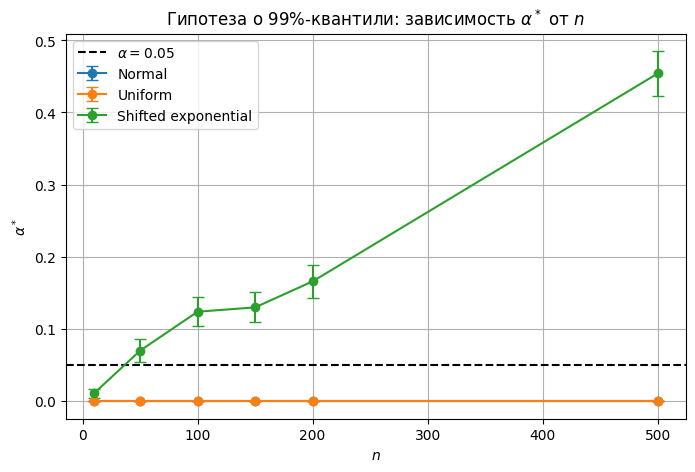

In [21]:
plt.figure(figsize=(8,5))
for name, (a, l, u) in res_q_alpha.items():
    plt.errorbar(n_values, a, yerr=[a-l, u-a], marker='o', capsize=4, label=name)

plt.axhline(alpha, color='black', linestyle='--', label=r'$\alpha=0.05$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\alpha^*$')
plt.title(r'Гипотеза о 99%-квантили: зависимость $\alpha^*$ от $n$')
plt.legend()
plt.grid(True)
plt.show()

Результаты моделирования показывают, что при проверке гипотезы
$H_0:\ q_{0.99}<d$ биномиальный критерий демонстрирует различное поведение
для разных распределений.

Для нормального и равномерного распределений реально достигаемый уровень
значимости $\alpha^*$ близок к нулю, что свидетельствует о консервативности критерия.

Для сдвинутого экспоненциального распределения наблюдается рост $\alpha^*$
при увеличении объёма выборки $n$. Это связано с наличием тяжёлого правого хвоста
и тем, что истинный 99%-квантиль превышает порог $d$, в результате чего вероятность
появления экстремальных наблюдений возрастает с ростом $n$.

## 6. Проверка гипотезы об интерквантильном промежутке

Рассматривается проверка гипотезы о том, что хотя бы один 95%-интерквантильный
промежуток генеральной совокупности целиком укладывается в заданный интервал.

Формально проверяется гипотеза
$$
H_0:\ \exists\ [q_{0.025}, q_{0.975}] \subset [-t,t],
$$
против альтернативной гипотезы
$$
H_1:\ \forall\ [q_{0.025}, q_{0.975}] \not\subset [-t,t],
$$
где $t=5$.

В пункте 3 истинное среднеквадратическое отклонение варьируется
в диапазоне
$$
\sigma \in \{1.0,\;1.2,\;1.4,\;\ldots,\;t\}.
$$

### Идея критерия

Пусть $X_1,\dots,X_n$ — выборка из распределения $F$.
Обозначим выборочные квантили:
$$
\hat q_{0.025},\quad \hat q_{0.975}.
$$

Гипотеза $H_0$ принимается, если выполняется включение
$$
[\hat q_{0.025},\hat q_{0.975}] \subset [-t,t],
$$
то есть
$$
\hat q_{0.025} \ge -t \quad \text{и} \quad \hat q_{0.975} \le t.
$$

Если хотя бы одно из этих условий нарушается, нулевая гипотеза отвергается.


In [22]:
def test_iqr_inside_interval(
    x: np.ndarray,
    t: float
) -> bool:
    """
    Проверка гипотезы:
    H0: [q_0.025, q_0.975] ⊂ [-t, t]

    Возвращает True, если H0 отвергается.
    """
    q_low, q_high = np.quantile(x, [0.025, 0.975])
    reject = (q_low < -t) or (q_high > t)
    return reject

### Оценка вероятности отклонения

Оценивается величина
$$
P(\text{reject }H_0),
$$
которая при выполнении $H_0$ соответствует ошибке первого рода,
а при нарушении $H_0$ характеризует мощность критерия.


In [24]:
def estimate_rejection_probability_iqr(
    base_sampler,
    sigma: float,
    n: int,
    N: int,
    t: float,
    rng: np.random.Generator
) -> float:
    """
    Оценка P(reject H0) для интерквантильного промежутка
    при заданном sigma.
    """
    scale_sampler = sampler_with_variance(base_sampler, sigma**2)

    rejections = 0
    for _ in range(N):
        x = scale_sampler(n, rng)
        if test_iqr_inside_interval(x, t):
            rejections += 1
    return rejections / N

### Реально достигаемый уровень значимости $\alpha^*$

Для оценки $\alpha^*$ моделирование проводится при $\sigma=1$,
что соответствует выполнению нулевой гипотезы.

In [25]:
t = 5.0

def run_iqr_alpha_star(base_sampler, n_values, N, t, rng, sigma=1.0):
    alpha_stars, ci_l, ci_u = [], [], []
    for n in n_values:
        p_hat = estimate_rejection_probability_iqr(
            base_sampler, sigma, n, N, t, rng
        )
        lo, up = prob_confidence_interval(p_hat, N)
        alpha_stars.append(p_hat)
        ci_l.append(lo)
        ci_u.append(up)
    return np.array(alpha_stars), np.array(ci_l), np.array(ci_u)

rng = np.random.default_rng(seed=808)

res_iqr_alpha = {
    "Normal": run_iqr_alpha_star(sample_normal, n_values, N, t, rng),
    "Uniform": run_iqr_alpha_star(sample_uniform, n_values, N, t, rng),
    "Shifted exponential": run_iqr_alpha_star(sample_shifted_exponential, n_values, N, t, rng),
}

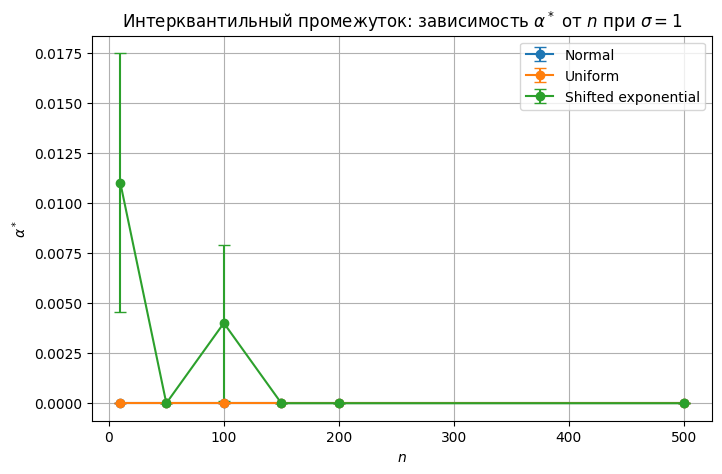

In [26]:
plt.figure(figsize=(8,5))
for name, (a, l, u) in res_iqr_alpha.items():
    plt.errorbar(n_values, a, yerr=[a-l, u-a], marker='o', capsize=4, label=name)

plt.xlabel(r'$n$')
plt.ylabel(r'$\alpha^*$')
plt.title(r'Интерквантильный промежуток: зависимость $\alpha^*$ от $n$ при $\sigma=1$')
plt.legend()
plt.grid(True)
plt.show()

### Влияние среднеквадратического отклонения

Далее исследуется вероятность отклонения $H_0$ при увеличении
$\sigma$ от $1$ до $t$ с шагом $0.2$.


In [27]:
sigma_values = np.arange(1.0, t + 1e-12, 0.2)

def run_iqr_sigma_grid(base_sampler, sigma_list, n_values, N, t, rng):
    mat = np.zeros((len(sigma_list), len(n_values)))
    for i, s in enumerate(sigma_list):
        for j, n in enumerate(n_values):
            mat[i, j] = estimate_rejection_probability_iqr(
                base_sampler, s, n, N, t, rng
            )
    return mat

rng = np.random.default_rng(seed=909)

mat_iqr_normal = run_iqr_sigma_grid(sample_normal, sigma_values, n_values, N, t, rng)
mat_iqr_uniform = run_iqr_sigma_grid(sample_uniform, sigma_values, n_values, N, t, rng)
mat_iqr_shifted_exp = run_iqr_sigma_grid(sample_shifted_exponential, sigma_values, n_values, N, t, rng)


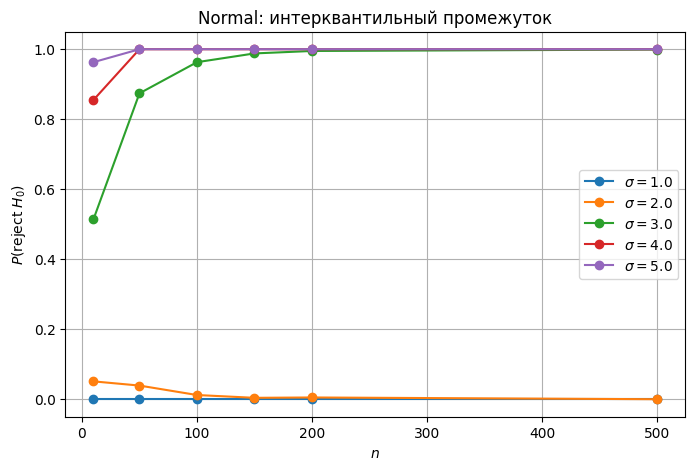

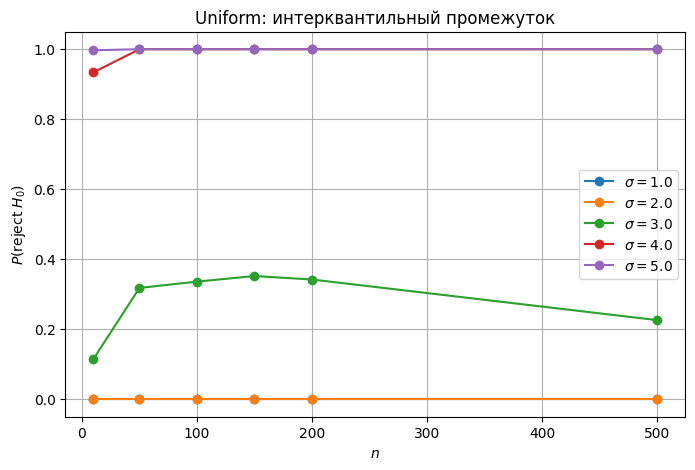

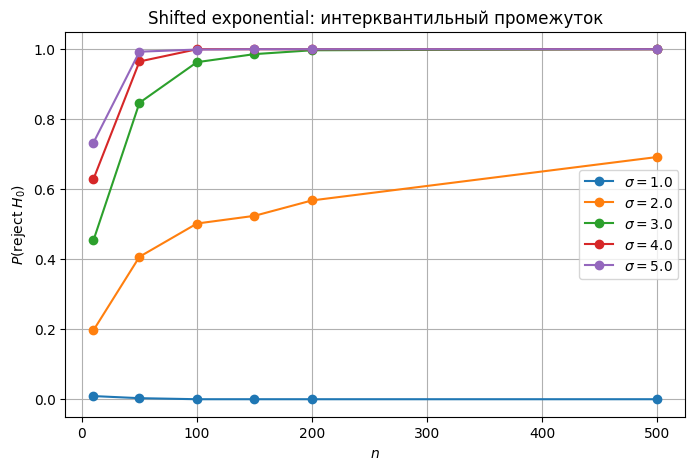

In [28]:
sigma_plot = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
idx_plot = [np.where(np.isclose(sigma_values, s))[0][0] for s in sigma_plot]

def plot_rejection_curves_iqr(n_values, sigma_list, mat, title):
    plt.figure(figsize=(8,5))
    for i, s in enumerate(sigma_list):
        plt.plot(n_values, mat[i, :], marker='o', label=rf'$\sigma={s}$')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$P(\text{reject }H_0)$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rejection_curves_iqr(n_values, sigma_plot, mat_iqr_normal[idx_plot, :], "Normal: интерквантильный промежуток")
plot_rejection_curves_iqr(n_values, sigma_plot, mat_iqr_uniform[idx_plot, :], "Uniform: интерквантильный промежуток")
plot_rejection_curves_iqr(n_values, sigma_plot, mat_iqr_shifted_exp[idx_plot, :], "Shifted exponential: интерквантильный промежуток")

### Вывод по интерквантильному промежутку

Результаты моделирования показывают, что при $\sigma=1$ критерий проверки гипотезы
о включении 95%-интерквантильного промежутка в интервал $[-t,t]$ является
консервативным для всех рассмотренных распределений.

При увеличении среднеквадратического отклонения $\sigma$ вероятность выхода
интерквантильного промежутка за границы $[-t,t]$ возрастает, что приводит к росту
вероятности отклонения нулевой гипотезы.
Форма распределения оказывает существенное влияние на скорость роста мощности,
что особенно заметно для асимметричного сдвинутого экспоненциального распределения.

## Общие выводы

В работе методом массового статистического моделирования исследованы свойства
проверок гипотез о медиане, дисперсии, квантили и интерквантильном промежутке
для различных распределений.

Показано, что при глубоком выполнении нулевых гипотез критерии, как правило,
демонстрируют консервативное поведение, а реально достигаемый уровень значимости
$\alpha^*$ оказывается меньше номинального.

При нарушении нулевых гипотез вероятность их отклонения возрастает с увеличением
объёма выборки, что свидетельствует о состоятельности критериев.
Форма распределения оказывает существенное влияние на скорость роста мощности,
особенно для асимметричных распределений с тяжёлыми хвостами.
